####################################################################<br>
Author : Nandhakumar Thangavelu<br>
Project : CS7641 Machine Learning - Assignment #3<br>
####################################################################

In [1]:
import os
import gzip
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import time
import scipy
import scipy.stats
from scipy.linalg import pinv

In [2]:
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import FastICA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score, mean_squared_error
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import TruncatedSVD as SVD
from sklearn.random_projection import SparseRandomProjection
from sklearn.random_projection import GaussianRandomProjection
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn import mixture
from sklearn.mixture import GaussianMixture

import warnings
warnings.filterwarnings('ignore')

seed = 123

### Data processing

In [3]:
diabetes_data_location = 'data/diabetes.csv'  ## diabetes  data
wine_quality_data_location = 'data/winequality-white.csv'  ## Wine Quality data set

Load data

In [4]:
wine_quality_df = pd.read_csv(wine_quality_data_location, sep=';')
y = wine_quality_df['quality']
X = wine_quality_df.drop(columns='quality')

dataset_name = " - Wine data"

scale = MinMaxScaler(feature_range=[0, 100])
scale.fit(X)
X_norm = pd.DataFrame(scale.transform(X))

In [5]:
#print(X_norm)
print('Number of wine example selected: ' + str(len(X_norm)))

Number of wine example selected: 4898


### KMeans Clustering

In [6]:
silhouette_scores, completeness_scores, homogeneity_scores, NMI_scores, distance_km = [], [], [], [], []
clusters_range = list(range(2, 10))

start_time = time.time()

for n_clusters in clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=10).fit(X_norm)
    distance_km.append(kmeans.inertia_)
    kmeans_labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X_norm, kmeans_labels))
    completeness_scores.append(metrics.completeness_score(y, kmeans_labels))
    homogeneity_scores.append(metrics.homogeneity_score(y, kmeans_labels))
    NMI_scores.append(normalized_mutual_info_score(y, kmeans_labels))

end_time = time.time()

run_time = end_time - start_time
print('KMeans run time : {}'.format(run_time))

KMeans run time : 4.181209087371826


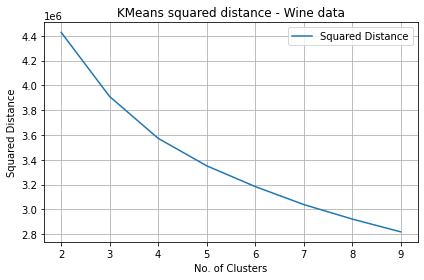

In [7]:
title = 'KMeans squared distance'

plt.figure()
plt.title(title + dataset_name)
plt.xlabel('No. of Clusters')
plt.ylabel('Squared Distance')

plt.plot(clusters_range, distance_km, label='Squared Distance')
plt.tight_layout()
plt.legend(loc="best")
plt.grid()
#plt.show()
plt.savefig('plots/wine/KMeans Clustering ' + title + '.png', bbox_inches="tight")
#plt.close()

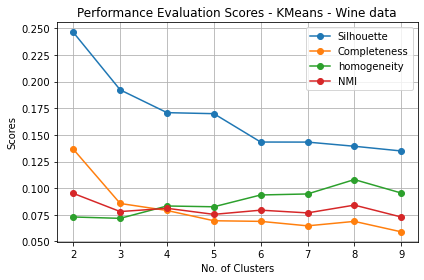

In [8]:
title = 'Performance Evaluation Scores - KMeans'

plt.figure()
plt.title(title + dataset_name)
plt.xlabel('No. of Clusters')
plt.ylabel('Scores')

plt.plot(clusters_range, silhouette_scores, label='Silhouette', marker="o", linestyle="-")
plt.plot(clusters_range, completeness_scores, label='Completeness', marker="o", linestyle="-")
plt.plot(clusters_range, homogeneity_scores, label='homogeneity', marker="o", linestyle="-")
plt.plot(clusters_range, NMI_scores, label='NMI', marker="o", linestyle="-")
plt.tight_layout()
plt.legend(loc="best")
plt.grid()
#plt.show()
plt.savefig('plots/wine/KMeans Clustering ' + title + '.png', bbox_inches="tight")
#plt.close()

### Gaussian - EM

In [9]:
silhouette_scores, completeness_scores, homogeneity_scores, NMI_scores, AIC_EM, BIC_EM = [], [], [], [], [], []
clusters_range = list(range(2, 10))

start_time = time.time()
for n_clusters in clusters_range:
    gm = GaussianMixture(n_components=n_clusters, random_state=10).fit(X_norm)
    gm_labels = gm.predict(X_norm)
    silhouette_scores.append(silhouette_score(X_norm, gm_labels))
    homogeneity_scores.append(metrics.homogeneity_score(y, gm_labels))
    completeness_scores.append(metrics.completeness_score(y, gm_labels))
    NMI_scores.append(normalized_mutual_info_score(y, gm_labels))
    AIC_EM.append(gm.aic(X_norm))
    BIC_EM.append(gm.bic(X_norm))
end_time = time.time()

run_time = end_time - start_time
print('EM run time : {}'.format(run_time))

EM run time : 4.953236818313599


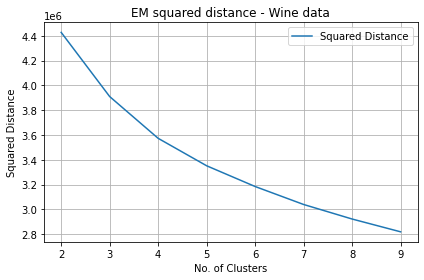

In [10]:
title = 'EM squared distance'

plt.figure()
plt.title(title + dataset_name)
plt.xlabel('No. of Clusters')
plt.ylabel('Squared Distance')

plt.plot(clusters_range, distance_km, label='Squared Distance')
plt.tight_layout()
plt.legend(loc="best")
plt.grid()
#plt.show()
plt.savefig('plots/wine/EM Clustering ' + title + '.png', bbox_inches="tight")
#plt.close()

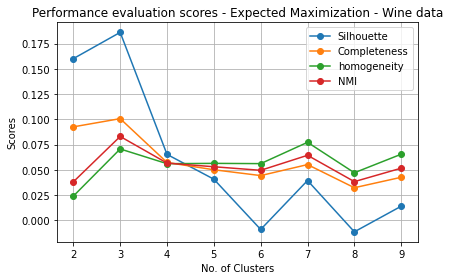

In [11]:
title = 'Performance evaluation scores - Expected Maximization'

plt.figure()
plt.title(title + dataset_name)
plt.xlabel('No. of Clusters')
plt.ylabel('Scores')

plt.plot(clusters_range, silhouette_scores, label='Silhouette', marker="o", linestyle="-")
plt.plot(clusters_range, completeness_scores, label='Completeness', marker="o", linestyle="-")
plt.plot(clusters_range, homogeneity_scores, label='homogeneity', marker="o", linestyle="-")
plt.plot(clusters_range, NMI_scores, label='NMI', marker="o", linestyle="-")
plt.tight_layout()
plt.legend(loc="best")
plt.grid()
#plt.show()
plt.savefig('plots/wine/EM Clustering ' + title + '.png', bbox_inches="tight")
#plt.close()

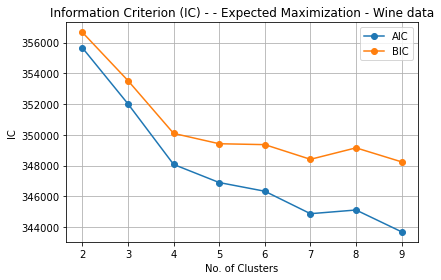

In [12]:
title = 'Information Criterion (IC) - - Expected Maximization'

plt.figure()
plt.title(title + dataset_name)
plt.xlabel('No. of Clusters')
plt.ylabel('IC')

plt.plot(clusters_range, AIC_EM, label="AIC", marker="o", linestyle="-")
plt.plot(clusters_range, BIC_EM, label="BIC", marker="o", linestyle="-")
plt.tight_layout()
plt.legend(loc="best")
plt.grid()
#plt.show()
plt.savefig('plots/wine/EM Clustering ' + title + '.png', bbox_inches="tight")
#plt.close()

#### Apply Dimensionality Reduction algorithms

##### PCA

PCA run time : 0.01701188087463379


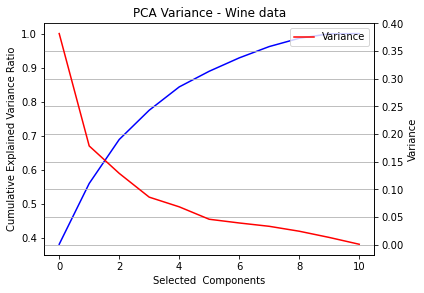

In [13]:
start_time = time.time()
data_pca = PCA(random_state=10).fit(X_norm)
cum_evr = np.cumsum(data_pca.explained_variance_ratio_)
end_time = time.time()
figure1, axis1 = plt.subplots()
axis1.set_ylabel('Cumulative Explained Variance Ratio')
axis1.tick_params('y')
axis1.plot(list(range(len(data_pca.explained_variance_ratio_))), cum_evr, 'b-', label='Cumulative Explained Variance Ratio')
axis1.set_xlabel('Selected  Components')
title = "PCA Variance"
axis2 = axis1.twinx()
axis2.plot(list(range(len(data_pca.explained_variance_ratio_))), data_pca.explained_variance_ratio_, 'r-', label='Variance')
axis2.set_ylabel('Variance')
axis2.tick_params('y')
plt.tight_layout()
plt.title(title + dataset_name)
plt.legend(loc="best")
plt.grid()
#plt.show()
plt.savefig('plots/wine/DM Reduction ' + title + '.png', bbox_inches="tight")
#plt.close()

run_time = end_time - start_time
print('PCA run time : {}'.format(run_time))



##### ICA

ICA run time : 0.2040705680847168


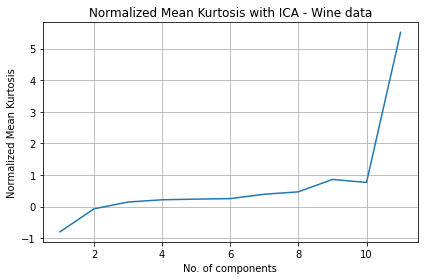

In [14]:
kurtosis = []
start_time = time.time()
dimensions = X_norm.shape[1] + 1 

for dim in range(1, dimensions):
    data_ica = FastICA(n_components = dim, random_state = 10).fit_transform(X_norm)
    kur = scipy.stats.kurtosis(data_ica)
    kurtosis.append(np.mean(kur)/dim)
    
kurtosis = np.array(kurtosis)

end_time = time.time()

title = 'Normalized Mean Kurtosis with ICA'
plt.figure()
plt.title(title + dataset_name)
plt.xlabel('No. of components')
plt.ylabel('Normalized Mean Kurtosis')

plt.plot(np.arange(1, dimensions), kurtosis)
plt.tight_layout()
#plt.legend(loc="best")
plt.grid()
#plt.show()
plt.savefig('plots/wine/DM Reduction ' + title + '.png', bbox_inches="tight")
#plt.close()

run_time = end_time - start_time
print('ICA run time : {}'.format(run_time))

#### Randomized Projections

RP run time : 6.850334644317627


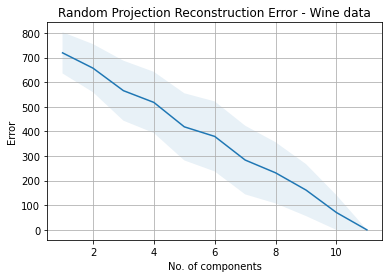

In [15]:
start_time = time.time()
dimensions = X_norm.shape[1] + 1
error = []
variance = []

for dim in range(1, dimensions):
    mean_mse = []
    for dim_range in range(0,100):
        randproj = GaussianRandomProjection(n_components=dim)
        randproj = randproj.fit(X_norm)
        w = randproj.components_
        p = pinv(w)
        reconstructed = ((p@w)@(X_norm.T)).T
        mean_mse.append(mean_squared_error(X_norm, reconstructed))
    variance.append(np.std(mean_mse))
    error.append(np.mean(mean_mse))

error = np.array(error)

end_time = time.time()

title = "Random Projection Reconstruction Error"

plt.figure()
plt.ylabel('Error')
plt.xlabel('No. of components')
plt.title(title + dataset_name)

plt.plot(np.arange(1,dimensions),error)
plt.fill_between(np.arange(1,dimensions),error - variance, error + variance, alpha=0.1)
plt.grid()
#plt.show()
plt.savefig('plots/wine/DM Reduction ' + title + '.png', bbox_inches="tight")
#plt.close()

run_time = end_time - start_time
print('RP run time : {}'.format(run_time))

##### SVD

SVD run time : 0.39014315605163574


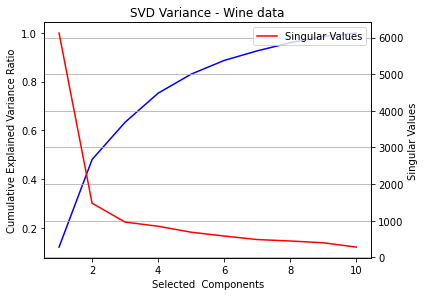

In [16]:
start_time = time.time()
dimensions =  list(range(1,X_norm.shape[1]))
data_svd = SVD(random_state=10)

for dim in dimensions:
    data_svd.set_params(n_components=dim)
    data_svd.fit_transform(X_norm)
    sv = data_svd.singular_values_
    cum_evr = np.cumsum(data_svd.explained_variance_ratio_)

title = "SVD Variance"
figure1, axis1 = plt.subplots()
axis1.set_xlabel('Selected  Components')
axis1.set_ylabel('Cumulative Explained Variance Ratio')
axis1.plot(dimensions, cum_evr, 'b-', label='Cumulative Explained Variance Ratio')
axis1.tick_params('y')

axis2 = axis1.twinx()
axis2.plot(dimensions, sv, 'r-', label='Singular Values')
axis2.set_ylabel('Singular Values')
axis2.tick_params('y')
plt.tight_layout()
plt.legend(loc="best")
plt.title(title + dataset_name)
plt.grid()
#plt.show()
plt.savefig('plots/wine/DM Reduction ' + title + '.png', bbox_inches="tight")
#plt.close()

end_time = time.time()

run_time = end_time - start_time
print('SVD run time : {}'.format(run_time))

### Clustering & Dimensionality Reduction

##### KMeans

In [17]:
clusters_range = list(range(2, 50))
distance_km, distance_km_pca, distance_km_ica, distance_km_rp, distance_km_svd = [], [], [], [], []
silhouette_scores, silhouette_scores_km_pca, silhouette_scores_km_ica, silhouette_scores_km_rp, silhouette_scores_km_svd = [], [], [], [], []
homogeneity_scores, homogeneity_scores_km_pca, homogeneity_scores_km_ica, homogeneity_scores_km_rp, homogeneity_scores_km_svd = [], [], [], [], []
completeness_scores, completeness_scores_km_pca, completeness_scores_km_ica, completeness_scores_km_rp, completeness_scores_km_svd = [], [], [], [], []

In [18]:
for n_clusters in list(clusters_range):
    data_X_pca = PCA(n_components=2, random_state=10).fit_transform(X_norm)
    data_X_ica = FastICA(n_components=9, random_state=10).fit_transform(X_norm)
    data_X_rp = GaussianRandomProjection(n_components=10, random_state=10).fit_transform(X_norm)
    data_X_svd = SVD(n_components=4, random_state=10).fit_transform(X_norm)
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=10).fit(X_norm)
    km_cluster_pca = KMeans(n_clusters=n_clusters, random_state=10).fit(data_X_pca)
    km_cluster_ica = KMeans(n_clusters=n_clusters, random_state=10).fit(data_X_ica)
    km_cluster_rp = KMeans(n_clusters=n_clusters, random_state=10).fit(data_X_rp)
    km_cluster_svd = KMeans(n_clusters=n_clusters, random_state=10).fit(data_X_svd)
    
    distance_km.append(kmeans.inertia_)
    distance_km_pca.append(km_cluster_pca.inertia_)
    distance_km_ica.append(km_cluster_ica.inertia_)
    distance_km_rp.append(km_cluster_rp.inertia_)
    distance_km_svd.append(km_cluster_svd.inertia_)
    
    km_labels = kmeans.labels_
    km_labels_pca = km_cluster_pca.labels_
    km_labels_ica = km_cluster_ica.labels_
    km_labels_rp = km_cluster_rp.labels_
    km_labels_svd = km_cluster_svd.labels_
    
    silhouette_scores.append(silhouette_score(X_norm, km_labels))
    silhouette_scores_km_pca.append(silhouette_score(data_X_pca, km_labels_pca))
    silhouette_scores_km_ica.append(silhouette_score(data_X_ica, km_labels_ica))
    silhouette_scores_km_rp.append(silhouette_score(data_X_rp, km_labels_rp))
    silhouette_scores_km_svd.append(silhouette_score(data_X_svd, km_labels_svd))
    
    homogeneity_scores.append(metrics.homogeneity_score(y, km_labels))
    homogeneity_scores_km_pca.append(metrics.homogeneity_score(y, km_labels_pca))
    homogeneity_scores_km_ica.append(metrics.homogeneity_score(y, km_labels_ica))
    homogeneity_scores_km_rp.append(metrics.homogeneity_score(y, km_labels_rp))
    homogeneity_scores_km_svd.append(metrics.homogeneity_score(y, km_labels_svd))
    
    completeness_scores.append(metrics.completeness_score(y, km_labels))
    completeness_scores_km_pca.append(metrics.completeness_score(y, km_labels_pca))
    completeness_scores_km_ica.append(metrics.completeness_score(y, km_labels_ica))
    completeness_scores_km_rp.append(metrics.completeness_score(y, km_labels_rp))
    completeness_scores_km_svd.append(metrics.completeness_score(y, km_labels_svd))

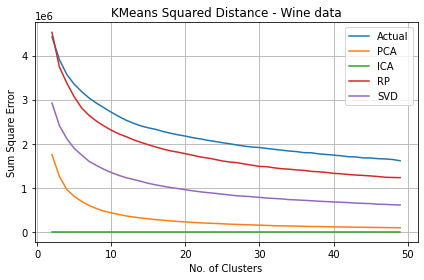

In [19]:
title = 'KMeans Squared Distance'

plt.figure()
plt.title(title + dataset_name)
plt.xlabel('No. of Clusters')
plt.ylabel('Sum Square Error')

plt.plot(clusters_range, distance_km, label="Actual")
plt.plot(clusters_range, distance_km_pca, label="PCA")
plt.plot(clusters_range, distance_km_ica, label="ICA")
plt.plot(clusters_range, distance_km_rp, label="RP")
plt.plot(clusters_range, distance_km_svd, label="SVD")
plt.tight_layout()
plt.legend(loc="best")
plt.grid()
#plt.show()
plt.savefig('plots/wine/Clustering & Reduction ' + title + '.png', bbox_inches="tight")
#plt.close()

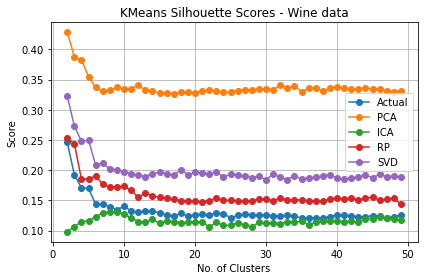

In [20]:
title = 'KMeans Silhouette Scores'

plt.figure()
plt.title(title + dataset_name)
plt.xlabel('No. of Clusters')
plt.ylabel('Score')

plt.plot(clusters_range, silhouette_scores, label="Actual", marker="o", linestyle="-")
plt.plot(clusters_range, silhouette_scores_km_pca, label="PCA", marker="o", linestyle="-")
plt.plot(clusters_range, silhouette_scores_km_ica, label="ICA", marker="o", linestyle="-")
plt.plot(clusters_range, silhouette_scores_km_rp, label="RP", marker="o", linestyle="-")
plt.plot(clusters_range, silhouette_scores_km_svd, label="SVD", marker="o", linestyle="-")

plt.tight_layout()
plt.legend(loc="best")
plt.grid()
#plt.show()
plt.savefig('plots/wine/Clustering & Reduction ' + title + '.png', bbox_inches="tight")
#plt.close()

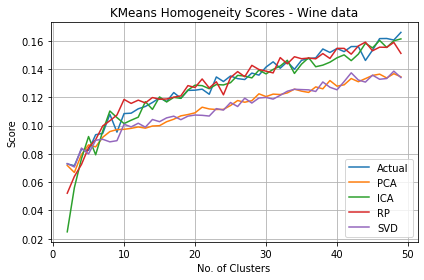

In [21]:
title = 'KMeans Homogeneity Scores'

plt.figure()
plt.title(title + dataset_name)
plt.xlabel('No. of Clusters')
plt.ylabel('Score')

plt.plot(clusters_range, homogeneity_scores, label="Actual")
plt.plot(clusters_range, homogeneity_scores_km_pca, label="PCA")
plt.plot(clusters_range, homogeneity_scores_km_ica, label="ICA")
plt.plot(clusters_range, homogeneity_scores_km_rp, label="RP")
plt.plot(clusters_range, homogeneity_scores_km_svd, label="SVD")

plt.tight_layout()
plt.legend(loc="best")
plt.grid()
#plt.show()
plt.savefig('plots/wine/Clustering & Reduction ' + title + '.png', bbox_inches="tight")
#plt.close()

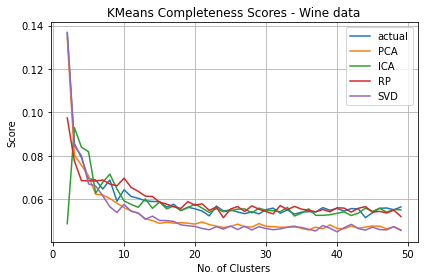

In [22]:
title = 'KMeans Completeness Scores'

plt.figure()
plt.title(title + dataset_name)
plt.xlabel('No. of Clusters')
plt.ylabel('Score')

plt.plot(clusters_range, completeness_scores, label="actual")
plt.plot(clusters_range, completeness_scores_km_pca, label="PCA")
plt.plot(clusters_range, completeness_scores_km_ica, label="ICA")
plt.plot(clusters_range, completeness_scores_km_rp, label="RP")
plt.plot(clusters_range, completeness_scores_km_svd, label="SVD")

plt.tight_layout()
plt.legend(loc="best")
plt.grid()
#plt.show()
plt.savefig('plots/wine/Clustering & Reduction ' + title + '.png', bbox_inches="tight")
#plt.close()

#### Gaussian - EM

In [23]:
clusters_range = list(range(2, 50))
aic_gm, aic_gm_pca, aic_gm_ica, aic_gm_rp, aic_gm_svd = [], [], [], [], []
bic_gm, bic_gm_pca, bic_gm_ica, bic_gm_rp, bic_gm_svd = [], [], [], [], []
silhouette_scores_gm, silhouette_scores_gm_pca, silhouette_scores_gm_ica, silhouette_scores_gm_rp, silhouette_scores_gm_svd = [], [], [], [], []
homogeneity_scores_gm, homogeneity_scores_gm_pca, homogeneity_scores_gm_ica, homogeneity_scores_gm_rp, homogeneity_scores_gm_svd = [], [], [], [], []
completeness_scores_gm, completeness_scores_gm_pca, completeness_scores_gm_ica, completeness_scores_gm_rp, completeness_scores_gm_svd = [], [], [], [], []

In [24]:
for index, n_clusters in enumerate(clusters_range):
    data_X_pca = PCA(n_components=2, random_state=10).fit_transform(X_norm)
    data_X_ica = FastICA(n_components=9, random_state=10).fit_transform(X_norm)
    data_X_rp = GaussianRandomProjection(n_components=10, random_state=10).fit_transform(X_norm)
    data_X_svd = SVD(n_components=4, random_state=10).fit_transform(X_norm)
    
    gm = GaussianMixture(n_components=n_clusters, random_state=10).fit(X_norm)
    gm_cluster_pca = GaussianMixture(n_components=n_clusters, random_state=10).fit(data_X_pca)
    gm_cluster_ica = GaussianMixture(n_components=n_clusters, random_state=10).fit(data_X_ica)
    gm_cluster_rp = GaussianMixture(n_components=n_clusters, random_state=10).fit(data_X_rp)
    gm_cluster_svd = GaussianMixture(n_components=n_clusters, random_state=10).fit(data_X_svd)
    
    em_labels = gm.predict(X_norm)
    em_labels_pca = gm_cluster_pca.predict(data_X_pca)
    em_labels_ica = gm_cluster_ica.predict(data_X_ica)
    em_labels_rp = gm_cluster_rp.predict(data_X_rp)
    em_labels_svd = gm_cluster_svd.predict(data_X_svd)
    
    bic_gm.append(gm.bic(X_norm))
    bic_gm_pca.append(gm_cluster_pca.bic(data_X_pca))
    bic_gm_ica.append(gm_cluster_ica.bic(data_X_ica))
    bic_gm_rp.append(gm_cluster_rp.bic(data_X_rp))
    bic_gm_svd.append(gm_cluster_svd.bic(data_X_svd))
    
    aic_gm.append(gm.aic(X_norm))
    aic_gm_pca.append(gm_cluster_pca.aic(data_X_pca))
    aic_gm_ica.append(gm_cluster_ica.aic(data_X_ica))
    aic_gm_rp.append(gm_cluster_rp.aic(data_X_rp))
    aic_gm_svd.append(gm_cluster_svd.aic(data_X_svd))
    
    silhouette_scores_gm.append(silhouette_score(X_norm, em_labels))
    silhouette_scores_gm_pca.append(silhouette_score(data_X_pca, em_labels_pca))
    silhouette_scores_gm_ica.append(silhouette_score(data_X_ica, em_labels_ica))
    silhouette_scores_gm_rp.append(silhouette_score(data_X_rp, em_labels_rp))
    silhouette_scores_gm_svd.append(silhouette_score(data_X_svd, em_labels_svd))
    
    homogeneity_scores_gm.append(metrics.homogeneity_score(y, em_labels))
    homogeneity_scores_gm_pca.append(metrics.homogeneity_score(y, em_labels_pca))
    homogeneity_scores_gm_ica.append(metrics.homogeneity_score(y, em_labels_ica))
    homogeneity_scores_gm_rp.append(metrics.homogeneity_score(y, em_labels_rp))
    homogeneity_scores_gm_svd.append(metrics.homogeneity_score(y, em_labels_svd))
    
    completeness_scores_gm.append(metrics.completeness_score(y, em_labels))
    completeness_scores_gm_pca.append(metrics.completeness_score(y, em_labels_pca))
    completeness_scores_gm_ica.append(metrics.completeness_score(y, em_labels_ica))
    completeness_scores_gm_rp.append(metrics.completeness_score(y, em_labels_rp))
    completeness_scores_gm_svd.append(metrics.completeness_score(y, em_labels_svd))

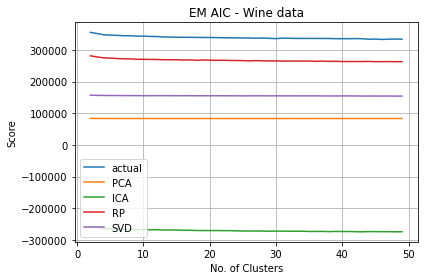

In [25]:
title = 'EM AIC'

plt.figure()
plt.title(title + dataset_name)
plt.xlabel('No. of Clusters')
plt.ylabel('Score')

plt.plot(clusters_range, aic_gm, label="actual")
plt.plot(clusters_range, aic_gm_pca, label="PCA")
plt.plot(clusters_range, aic_gm_ica, label="ICA")
plt.plot(clusters_range, aic_gm_rp, label="RP")
plt.plot(clusters_range, aic_gm_svd, label="SVD")

plt.tight_layout()
plt.legend(loc="best")
plt.grid()
#plt.show()
plt.savefig('plots/wine/Clustering & Reduction ' + title + '.png', bbox_inches="tight")
#plt.close()

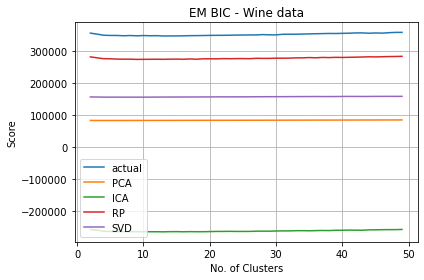

In [26]:
title = 'EM BIC'

plt.figure()
plt.title(title + dataset_name)
plt.xlabel('No. of Clusters')
plt.ylabel('Score')

plt.plot(clusters_range, bic_gm, label="actual")
plt.plot(clusters_range, bic_gm_pca, label="PCA")
plt.plot(clusters_range, bic_gm_ica, label="ICA")
plt.plot(clusters_range, bic_gm_rp, label="RP")
plt.plot(clusters_range, bic_gm_svd, label="SVD")

plt.tight_layout()
plt.legend(loc="best")
plt.grid()
#plt.show()
plt.savefig('plots/wine/Clustering & Reduction ' + title + '.png', bbox_inches="tight")
#plt.close()

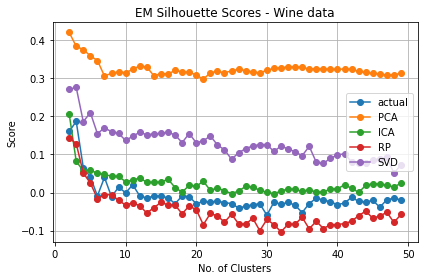

In [27]:
title = 'EM Silhouette Scores'

plt.figure()
plt.title(title + dataset_name)
plt.xlabel('No. of Clusters')
plt.ylabel('Score')

plt.plot(clusters_range, silhouette_scores_gm, label="actual", marker="o", linestyle="-")
plt.plot(clusters_range, silhouette_scores_gm_pca, label="PCA", marker="o", linestyle="-")
plt.plot(clusters_range, silhouette_scores_gm_ica, label="ICA", marker="o", linestyle="-")
plt.plot(clusters_range, silhouette_scores_gm_rp, label="RP", marker="o", linestyle="-")
plt.plot(clusters_range, silhouette_scores_gm_svd, label="SVD", marker="o", linestyle="-")

plt.tight_layout()
plt.legend(loc="best")
plt.grid()
#plt.show()
plt.savefig('plots/wine/Clustering & Reduction ' + title + '.png', bbox_inches="tight")
#plt.close()

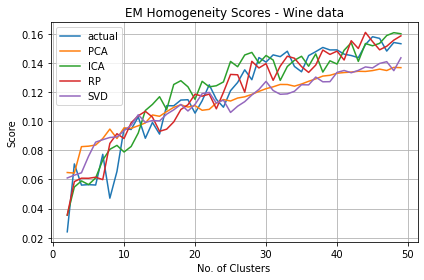

In [28]:
title = 'EM Homogeneity Scores'

plt.figure()
plt.title(title + dataset_name)
plt.xlabel('No. of Clusters')
plt.ylabel('Score')

plt.plot(clusters_range, homogeneity_scores_gm, label="actual")
plt.plot(clusters_range, homogeneity_scores_gm_pca, label="PCA")
plt.plot(clusters_range, homogeneity_scores_gm_ica, label="ICA")
plt.plot(clusters_range, homogeneity_scores_gm_rp, label="RP")
plt.plot(clusters_range, homogeneity_scores_gm_svd, label="SVD")

plt.tight_layout()
plt.legend(loc="best")
plt.grid()
#plt.show()
plt.savefig('plots/wine/Clustering & Reduction ' + title + '.png', bbox_inches="tight")
#plt.close()

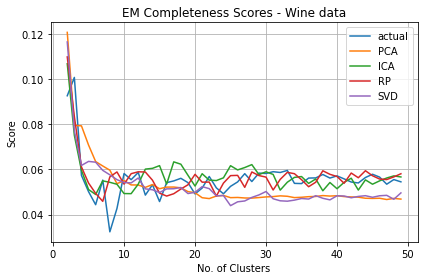

In [29]:
title = 'EM Completeness Scores'

plt.figure()
plt.title(title + dataset_name)
plt.xlabel('No. of Clusters')
plt.ylabel('Score')

plt.plot(clusters_range, completeness_scores_gm, label="actual")
plt.plot(clusters_range, completeness_scores_gm_pca, label="PCA")
plt.plot(clusters_range, completeness_scores_gm_ica, label="ICA")
plt.plot(clusters_range, completeness_scores_gm_rp, label="RP")
plt.plot(clusters_range, completeness_scores_gm_svd, label="SVD")

plt.tight_layout()
plt.legend(loc="best")
plt.grid()
#plt.show()
plt.savefig('plots/wine/Clustering & Reduction ' + title + '.png', bbox_inches="tight")
#plt.close()